In [17]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [18]:
from sklearn.feature_extraction.text import CountVectorizer


In [19]:
# Load dataset
df = df = pd.read_csv('laptops_dataset_final_600 (1).csv', encoding='utf-8')  
df 

,product_name,overall_rating,no_ratings,no_reviews,rating,title,review
0,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Perfect product!,"Loved it, it's my first MacBook that I earned ..."
1,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Fabulous!,Battery lasted longer than my first relationsh...
2,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Fabulous!,Such a great deal.. very happy with the perfor...
3,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,4,Delightful,"Awesome build quality and very good display, b..."
4,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Awesome,When i ordered and came to know about seller r...
...,...,...,...,...,...,...,...
24108,MSI Modern 14 Intel Core i5 13th Gen 1335U - (...,4.3,156,24,5,Perfect product!,MSI Laptop is high performance and the best. c...
24109,MSI Modern 14 Intel Core i5 13th Gen 1335U - (...,4.3,156,24,5,Perfect product!,Excellent performance best laptop.
24110,MSI Modern 14 Intel Core i5 13th Gen 1335U - (...,4.3,156,24,4,"Good product, Lacks features.",Decent battery life. Exceptional build quality...
24111,Lenovo IdeaPad 5 2-in-1 WUXGA IPS AMD Ryzen 7 ...,4.4,7,2,3,Nice,The product does not support facial recognitio...


In [20]:
#lnitial data inspection
df.head()

,product_name,overall_rating,no_ratings,no_reviews,rating,title,review
0,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Perfect product!,"Loved it, it's my first MacBook that I earned ..."
1,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Fabulous!,Battery lasted longer than my first relationsh...
2,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Fabulous!,Such a great deal.. very happy with the perfor...
3,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,4,Delightful,"Awesome build quality and very good display, b..."
4,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Awesome,When i ordered and came to know about seller r...


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24113 entries, 0 to 24112
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_name    24113 non-null  object 
 1   overall_rating  24113 non-null  float64
 2   no_ratings      24113 non-null  object 
 3   no_reviews      24113 non-null  object 
 4   rating          24113 non-null  int64  
 5   title           24113 non-null  object 
 6   review          24113 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.3+ MB


In [ ]:
# check the data types
df.dtypes

product_name       object
overall_rating    float64
no_ratings         object
no_reviews         object
rating              int64
title              object
review             object
dtype: object

In [23]:
df.size

168791

In [24]:
df.duplicated().sum()


7122

In [26]:
df = df.drop_duplicates()

In [27]:
df.describe()


,overall_rating,rating
count,16991.000000,16991.000000
mean,4.185622,4.214937
std,0.217054,1.185478
min,3.300000,1.000000
25%,4.100000,4.000000
50%,4.200000,5.000000
75%,4.300000,5.000000
max,5.000000,5.000000


In [28]:
#check for missing values
df.isnull().sum()

product_name      0
overall_rating    0
no_ratings        0
no_reviews        0
rating            0
title             0
review            0
dtype: int64

In [29]:
#fill or drop missing data
df['review'] =df['review'].fillna('no review')
df.dropna(inplace=True)
df

C:\Users\Abhi\AppData\Local\Temp\ipykernel_19476\3888845098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'] =df['review'].fillna('no review')
C:\Users\Abhi\AppData\Local\Temp\ipykernel_19476\3888845098.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


,product_name,overall_rating,no_ratings,no_reviews,rating,title,review
0,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Perfect product!,"Loved it, it's my first MacBook that I earned ..."
1,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Fabulous!,Battery lasted longer than my first relationsh...
2,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Fabulous!,Such a great deal.. very happy with the perfor...
3,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,4,Delightful,"Awesome build quality and very good display, b..."
4,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Awesome,When i ordered and came to know about seller r...
...,...,...,...,...,...,...,...
24108,MSI Modern 14 Intel Core i5 13th Gen 1335U - (...,4.3,156,24,5,Perfect product!,MSI Laptop is high performance and the best. c...
24109,MSI Modern 14 Intel Core i5 13th Gen 1335U - (...,4.3,156,24,5,Perfect product!,Excellent performance best laptop.
24110,MSI Modern 14 Intel Core i5 13th Gen 1335U - (...,4.3,156,24,4,"Good product, Lacks features.",Decent battery life. Exceptional build quality...
24111,Lenovo IdeaPad 5 2-in-1 WUXGA IPS AMD Ryzen 7 ...,4.4,7,2,3,Nice,The product does not support facial recognitio...


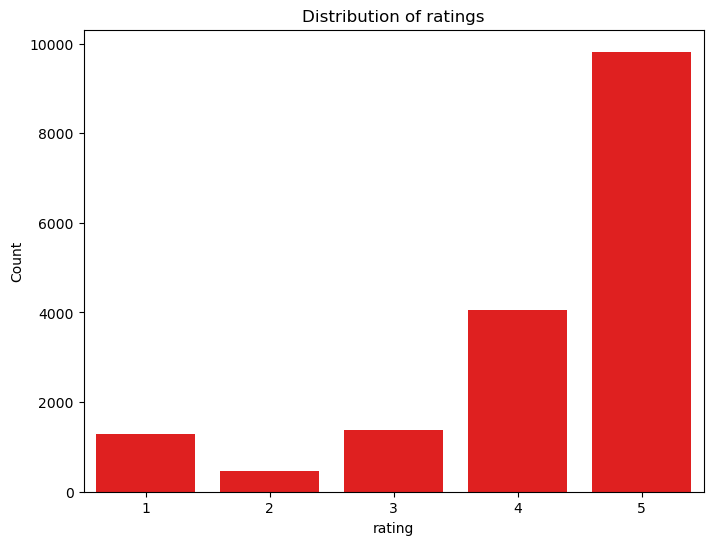

In [30]:
# Distribution of ratings
plt.figure(figsize=(8,6))
sns.countplot(x='rating', data=df,color='red')
plt.title('Distribution of ratings')
plt.xlabel('rating')
plt.ylabel('Count')
plt.show()

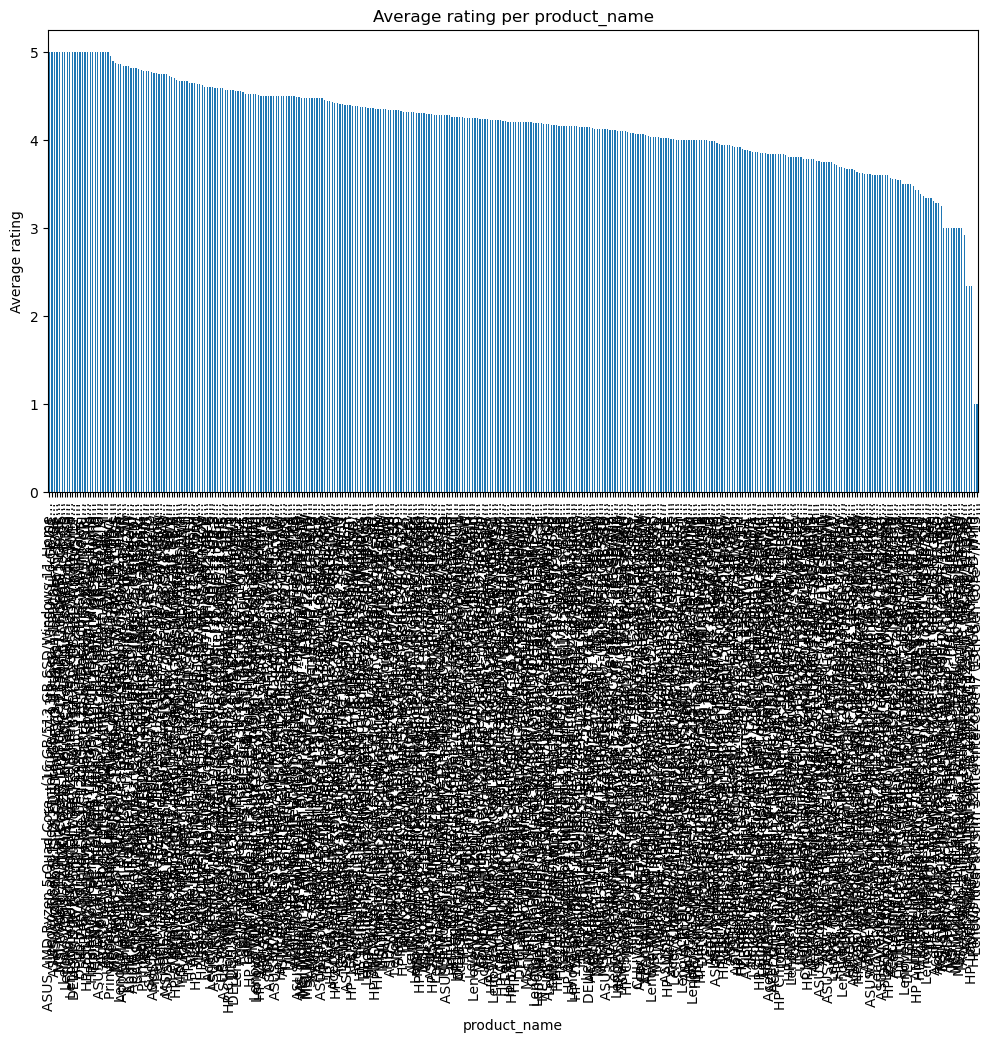

In [31]:
#Average rating per laptop model
avg_rating = df.groupby('product_name')['rating'].mean().sort_values(ascending=False)
avg_rating.plot(kind='bar', figsize=(12,6))
plt.title('Average rating per product_name')
plt.ylabel('Average rating')
plt.show()


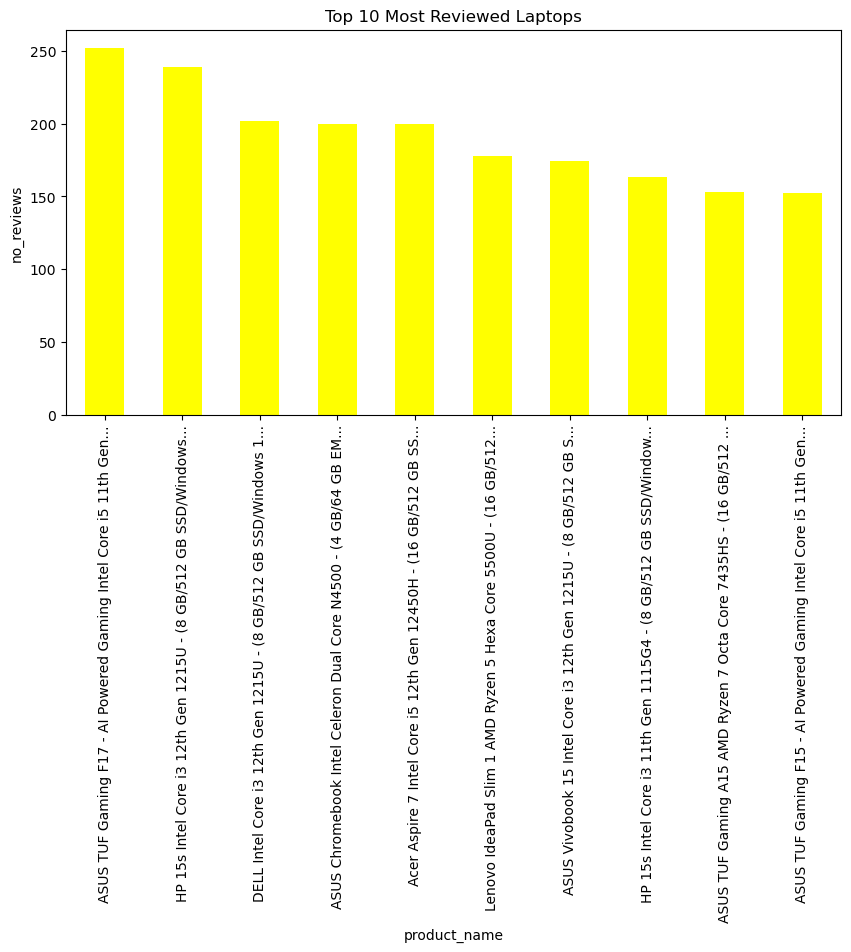

In [32]:
# Top 10 most reviewed laptops
top_reviewed = df['product_name'].value_counts().head(10)
top_reviewed.plot(kind='bar', figsize=(10,5),color='yellow')
plt.title('Top 10 Most Reviewed Laptops')
plt.ylabel('no_reviews')
plt.show()

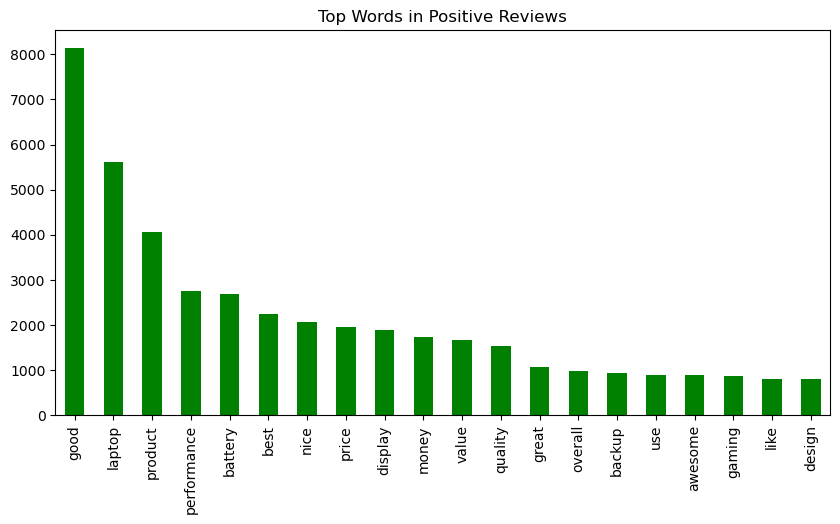

In [33]:
# Example: Factors contributing to good reviews
# Extract common words in positive reviews
vectorizer = CountVectorizer(stop_words='english', max_features=20)
X = vectorizer.fit_transform(df[df['rating'] >=4]['review'])
word_freq = np.array(X.sum(axis=0)).flatten()
words = vectorizer.get_feature_names_out()
positive_word_freq = pd.Series(word_freq, index=words)
positive_word_freq.sort_values(ascending=False).plot(kind='bar', figsize=(10,5),color='green')
plt.title('Top Words in Positive Reviews')
plt.show()